In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [39]:
rank_df = pd.read_csv('season_one_and_two_ranked_player_stats.csv')

In [40]:
rank_df.drop('Unnamed: 0', axis =1, inplace=True)
rank_df

,name,account_id,season,rank,assists,damageDealt,days,headshotKills,heals,kills,...,roundMostKills,roundsPlayed,suicides,swimDistance,timeSurvived,top10s,vehicleDestroys,walkDistance,weaponsAcquired,wins
0,Oilersfan74,account.166d81fc85534147b1b4bf2e537d5077,xbox-01,1,258,496847.470,120,822,4492,4016,...,11,4220,182,35318.7700,3551210.8,743,116,4822258.0,20648,64
1,ALPHA NANOC,account.f396a20e56a94b4ba82b5f4eebd54861,xbox-02,1,205,444983.030,109,938,1700,4104,...,18,1015,13,4118.4077,911952.4,341,48,2043421.2,4859,135
2,XIISJagobo,account.55ff3a6b5c964172a677104edeb8f2ce,xbox-02,2,404,701186.060,113,1246,6576,6081,...,15,2312,69,29266.5760,2733672.2,940,187,4058920.8,14552,269
3,WyattEarpXXX,account.d6c2446f5a924e53bb74b286ca1cc9ed,xbox-01,2,575,816185.700,111,1416,2160,6728,...,22,1535,25,7953.7310,1779426.0,638,81,2811716.8,7530,220
4,XIISJagobo,account.55ff3a6b5c964172a677104edeb8f2ce,xbox-01,3,404,701186.060,113,1246,6576,6081,...,15,2312,69,29266.5760,2733672.2,940,187,4058920.8,14552,269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,FredyMercsTeeth,account.4f81907a8ea44ed88dcd6456e36bbda5,xbox-01,496,99,162739.880,77,241,3165,1356,...,9,1487,28,13378.5090,1268191.5,165,4,1561471.5,8629,14
640,DMaintenanceMan,account.1fa4256076144155b45f674956af82dc,xbox-01,497,75,90082.414,110,121,1026,728,...,8,826,41,18404.8160,1031776.2,295,52,1235367.5,3882,19
641,celsorico,account.08c7062c36774f8abbfb60f6646113ba,xbox-01,498,82,133021.270,112,185,1243,982,...,6,1646,36,16255.1850,1358778.6,241,18,1922162.0,8883,6
642,JustPhilly69,account.931cf2e9ba90427b9a1662e7522ba1fa,xbox-01,499,65,92424.950,109,160,736,733,...,7,914,10,13168.5190,1093476.2,367,5,1524067.5,3940,50


In [41]:
top_150 = rank_df[rank_df['rank']<=150]
x = top_150['rank'].values.reshape(-1,1)
y = top_150['roundsPlayed'].values.reshape(-1,1)
y

array([[4220],
       [1015],
       [2312],
       [1535],
       [2312],
       [1683],
       [ 683],
       [4108],
       [2241],
       [2617],
       [2387],
       [1492],
       [2522],
       [1059],
       [2257],
       [2267],
       [2862],
       [2418],
       [1896],
       [1472],
       [2554],
       [1748],
       [1921],
       [2321],
       [ 190],
       [1924],
       [2522],
       [1729],
       [1948],
       [1335],
       [2192],
       [ 777],
       [2554],
       [2903],
       [1046],
       [ 932],
       [2321],
       [2555],
       [2862],
       [ 276],
       [1577],
       [1270],
       [2352],
       [ 725],
       [ 709],
       [2057],
       [ 852],
       [1614],
       [2513],
       [1656],
       [2314],
       [1948],
       [1615],
       [1907],
       [2044],
       [1619],
       [1468],
       [4220],
       [4385],
       [1383],
       [2241],
       [1335],
       [1907],
       [2565],
       [4108],
       [2124],
       [16

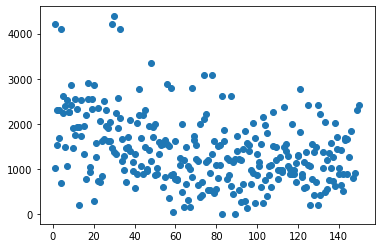

In [42]:
plt.scatter(x,y)

In [43]:
model = LinearRegression()
model.fit( x, y)


LinearRegression()

In [47]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)
x_min = np.array([[x.min()]])
x_max = np.array([[x.max()]])

Weight coefficients:  [[-6.25100323]]
y-axis intercept:  [1879.14994975]


In [48]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

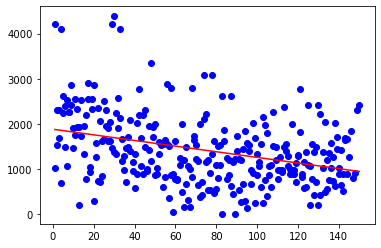

In [49]:
plt.scatter(x, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [52]:
predicted = model.predict(x)
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")


Mean Squared Error (MSE): 524408.5356104248
R-squared (R2 ): 0.11856032210588108


In [53]:
model.score(x, y)

0.11856032210588108

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=44)

In [86]:
model.fit(x_train, y_train)

LinearRegression()

In [87]:
model.score(x_test, y_test)

0.21885520022562754

In [88]:
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

NameError: name 'predictions' is not defined